In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.display import Latex
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)

In [2]:
work_dir = "./"

In [3]:
filePaths = [f for f in os.listdir(work_dir) if f.endswith(".txt")]
for i in range(len(filePaths)):
    print(f'{i} - {filePaths[i]}')

0 - healthOrderTime_localHost.txt
1 - healthOrderTime_miniNet3.txt
2 - healthOrderTime_miniNet2.txt
3 - healthOrderTime_miniNet1.txt


In [4]:
file = pd.read_csv(work_dir+filePaths[3], sep=',')

In [5]:
file.head()

,iterStep,process,time
0,0,health serialization,0.000405
1,1,health deserialization,1.183986
2,1,health serialization,0.000403
3,2,health deserialization,1.043999
4,2,order serialization,0.000914


In [6]:
datDF = file.copy()
datDF['iterStep'] = datDF['iterStep'].astype(int)
datDF['process'] = datDF['process'].astype(str)
datDF['time'] = datDF['time'].astype(float)
datDF.head()

,iterStep,process,time
0,0,health serialization,0.000405
1,1,health deserialization,1.183986
2,1,health serialization,0.000403
3,2,health deserialization,1.043999
4,2,order serialization,0.000914


In [7]:
tmpLST = []
for i in range(len(datDF)):
    if 'health' in datDF['process'][i].lower():
        tmpLST.append("health")
        datDF.at[i,'process'] = datDF['process'][i].lower().replace('health ',"")

    if 'order' in datDF['process'][i].lower():
        tmpLST.append("order")
        datDF.at[i,'process'] = datDF['process'][i].lower().replace('order ',"")
    
datDF['server'] = tmpLST

In [8]:
datDF.head()

,iterStep,process,time,server
0,0,serialization,0.000405,health
1,1,deserialization,1.183986,health
2,1,serialization,0.000403,health
3,2,deserialization,1.043999,health
4,2,serialization,0.000914,order


In [9]:
serialDF = datDF[datDF['process']=='serialization'].reset_index(drop=True)

# convert seconds to miliseconds
serialDF['time'] = serialDF['time']*1000

serialDF.head()

,iterStep,process,time,server
0,0,serialization,0.404596,health
1,1,serialization,0.402927,health
2,2,serialization,0.913620,order
3,3,serialization,0.417709,health
4,4,serialization,0.359535,health


In [10]:
deserialDF = datDF[datDF['process']=='deserialization'].reset_index(drop=True)
deserialDF.head()

,iterStep,process,time,server
0,1,deserialization,1.183986,health
1,2,deserialization,1.043999,health
2,3,deserialization,1.046151,order
3,4,deserialization,1.043331,health
4,5,deserialization,1.042087,health


# Latency Data Analysis

For this analysis we will be using a boxplot. A box and whisker plot (otherwise known as a boxplot), is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed and it also shows any outliers. It is a useful way to compare different sets of data as you can draw more than one boxplot per graph. These can be displayed alongside a number line, horizontally or vertically.

# Reading a Box and Whisker Plot

Interpreting a boxplot can be done once you understand what the different lines mean on a box and whisker diagram. The line splitting the box in two represents the median value. This shows that 50% of the data lies on the left hand side of the median value and 50% lies on the right hand side. The left edge of the box represents the lower quartile; it shows the value at which the first 25% of the data falls up to. The right edge of the box shows the upper quartile; it shows that 25% of the data lies to the right of the upper quartile value. The values at which the horizontal lines stop at are the values of the upper and lower values of the data. The single points on the diagram show the outliers.

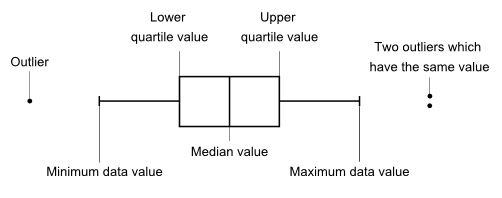

# Serialization

<AxesSubplot:xlabel='time', ylabel='server'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Server Latency')

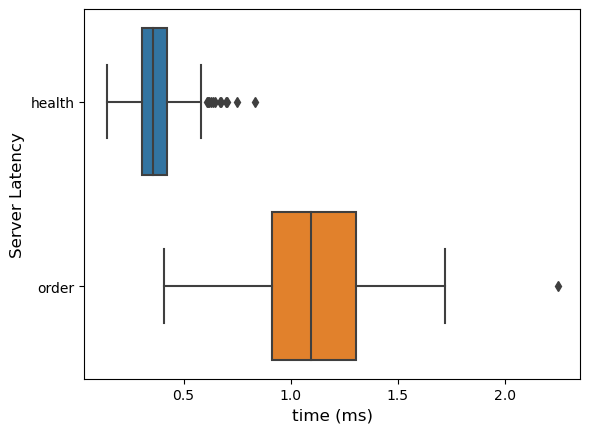

In [11]:
sns.boxplot(data=serialDF, x="time", y="server")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Server Latency', fontsize=12)
plt.show()

## Health Server

In [17]:
tmpHealth = serialDF[serialDF['server']=='health'].reset_index(drop=True)
tmpHealth.head()
print("Median value: {}".format(np.round_(np.median(tmpHealth['time']),3)))
tmpHealth.describe()

,iterStep,process,time,server
0,0,serialization,0.404596,health
1,1,serialization,0.402927,health
2,3,serialization,0.417709,health
3,4,serialization,0.359535,health
4,6,serialization,0.479460,health


Median value: 0.357


,iterStep,time
count,200.000000,200.000000
mean,149.000000,0.378846
std,86.816968,0.109768
min,0.000000,0.141621
25%,74.500000,0.307024
50%,149.000000,0.356555
75%,223.500000,0.422716
max,298.000000,0.832081


## Order Server

In [18]:
tmpOrder = serialDF[serialDF['server']=='order'].reset_index(drop=True)
tmpOrder.head()
print("Median value: {}".format(np.round_(np.median(tmpOrder['time']),3)))
tmpOrder.describe()

,iterStep,process,time,server
0,2,serialization,0.913620,order
1,5,serialization,0.672102,order
2,8,serialization,1.227140,order
3,11,serialization,0.748396,order
4,14,serialization,1.431704,order


Median value: 1.096


,iterStep,time
count,100.000000,100.000000
mean,150.500000,1.118457
std,87.034476,0.293942
min,2.000000,0.408411
25%,76.250000,0.912964
50%,150.500000,1.095653
75%,224.750000,1.306176
max,299.000000,2.247095


# Deserialization

<AxesSubplot:xlabel='time', ylabel='server'>

Text(0.5, 0, 'time (sec)')

Text(0, 0.5, 'Server Latency')

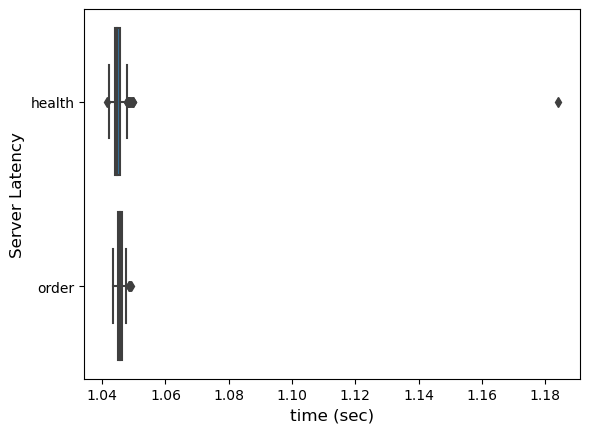

In [19]:
sns.boxplot(data=deserialDF, x="time", y="server")
plt.xlabel('time (sec)', fontsize=12)
plt.ylabel('Server Latency', fontsize=12)
# plt.xscale('log')

## Health Server

In [20]:
tmpHealth = deserialDF[deserialDF['server']=='health'].reset_index(drop=True)
tmpHealth.head()
print("Median value: {}".format(np.round_(np.median(tmpHealth['time']),3)))
tmpHealth.describe()

,iterStep,process,time,server
0,1,deserialization,1.183986,health
1,2,deserialization,1.043999,health
2,4,deserialization,1.043331,health
3,5,deserialization,1.042087,health
4,7,deserialization,1.045253,health


Median value: 1.045


,iterStep,time
count,200.000000,200.000000
mean,150.000000,1.045651
std,86.816968,0.009941
min,1.000000,1.041454
25%,75.500000,1.044061
50%,150.000000,1.044614
75%,224.500000,1.045577
max,299.000000,1.183986


## Order Server

In [21]:
tmpOrder = deserialDF[deserialDF['server']=='order'].reset_index(drop=True)
tmpOrder.head()
print("Median value: {}".format(np.round_(np.median(tmpOrder['time']),3)))
tmpOrder.describe()

,iterStep,process,time,server
0,3,deserialization,1.046151,order
1,6,deserialization,1.045310,order
2,9,deserialization,1.046686,order
3,12,deserialization,1.044443,order
4,15,deserialization,1.046621,order


Median value: 1.046


,iterStep,time
count,100.000000,100.000000
mean,151.500000,1.045729
std,87.034476,0.001042
min,3.000000,1.043475
25%,77.250000,1.045045
50%,151.500000,1.045716
75%,225.750000,1.046206
max,300.000000,1.049049
